# Activity 4.4:  a walk-through

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In Activity 4.4 you are given two datasets - one for each of the made-up courses QQ233 and QQ224. This data is supplied in the CSV data files in the data folder. 

Using the descriptive analysis tools covered at that point you are asked to compare the two datasets.

Note: If you have any observations to note, make them in the notebook cells. 
Try to get into the habit of make a note of what you are attempting to do, and then summarising any outputs or observations before you move on. That way you keep an immediate record of any activity.

# Start by reading the two datasets from the CSV files
Put the data into two _pandas_ DataFrames with meaningful names.

In [2]:
! ls data/Activity4.4datasets

QQ223.csv  QQ224.csv


In [3]:
!head data/Activity4.4datasets/QQ223.csv
!head data/Activity4.4datasets/QQ224.csv

QQ233,
Student,Mark
P231,58
P452,34
Q2314,3
P21,55
P6573,59
R233,61
R234,55
Q211,14
QQ224,
Student,Mark
P231,66
P452,64
Q2314,5
P21,56
P6573,79
R233,59
R234,50
Q211,19


In [4]:
QQ223df = pd.read_csv('data/Activity4.4datasets/QQ223.csv', header=1) 
QQ223df

,Student,Mark
0,P231,58
1,P452,34
2,Q2314,3
3,P21,55
4,P6573,59
5,R233,61
6,R234,55
7,Q211,14
8,P23,54
9,P8392,60


In [5]:
QQ224df = pd.read_csv('data/Activity4.4datasets/QQ224.csv', header=1) 
QQ224df

,Student,Mark
0,P231,66
1,P452,64
2,Q2314,5
3,P21,56
4,P6573,79
5,R233,59
6,R234,50
7,Q211,19
8,P23,67
9,P8392,99


# Calculate the required descriptive statistics
The question asks for the maximum, minimum, mean and median.

In [6]:
QQ223df['Mark'].max()

89

In [7]:
QQ223df['Mark'].min()

3

In [8]:
QQ223df['Mark'].mean()

44.5625

In [9]:
QQ223df['Mark'].median()

54.5

In [10]:
QQ224df['Mark'].max()

99

In [11]:
QQ224df['Mark'].min()

4

In [12]:
QQ224df['Mark'].mean()

58.0625

In [13]:
QQ224df['Mark'].median()

62.5

The `describe()` method gives some basic descriptive statistics for a Series.

In [14]:
QQ223df.describe()

,Mark
count,16.000000
mean,44.562500
std,22.864729
min,3.000000
25%,33.000000
50%,54.500000
75%,59.000000
max,89.000000


In [15]:
QQ224df.describe()

,Mark
count,16.000000
mean,58.062500
std,28.100934
min,4.000000
25%,54.500000
50%,62.500000
75%,70.000000
max,99.000000


#### Observations
The 25%, 50% and 75% figures (the mark value at which 25% of the population have a lower score, ... 75% are lower, etc.) suggest a skewed distribution of marks between the two modules,  with QQ224 students generally performing better. 

(We can check this with a simple histogram plot later).

# The activity text hints that plotting the two sets of data might be useful.

To do that it would be easier if we put the student name and the two sets of marks for each student into a single table.

This represents more data about each student, specifically another course mark for each student.
So, we want to join the two datasets using the common 'Student' column as the key.

First we'll need to rename one of the 'Mark' columns to avoid a name clash.

In [16]:
# Rename one of the 'Mark' columns.
QQ224df.columns = ['Student', 'Mark2']
QQ224df

,Student,Mark2
0,P231,66
1,P452,64
2,Q2314,5
3,P21,56
4,P6573,79
5,R233,59
6,R234,50
7,Q211,19
8,P23,67
9,P8392,99


In [17]:
# Now join the two DataFrames so that each student has data in a single row.
Combineddf = pd.merge(QQ223df, QQ224df, on=['Student'])
Combineddf.describe()

,Mark,Mark2
count,16.000000,16.000000
mean,44.562500,58.062500
std,22.864729,28.100934
min,3.000000,4.000000
25%,33.000000,54.500000
50%,54.500000,62.500000
75%,59.000000,70.000000
max,89.000000,99.000000


##### Observations
The datasets look like they have no rows that aren't matched in the other dataset: every student does both modules.   If we weren't sure there was a mark for each student in each original dataset we would use an outer join.

Note to self: a quick check is that we had 16 rows in each of the original DataFrames, and 16 in the result. No need for the outer join.

### Now we have a DataFrame with one student per row, we can visually explore the data with some simple `plot()`s 

Some suggestions are: 
- a simple scatter plot of the two mark sets
- a simple bar chart showing both marks for each student
- try sorting on different values, before plotting the bar charts.

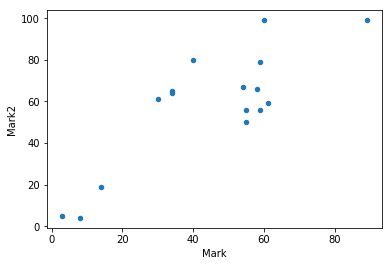

In [18]:
Combineddf.plot.scatter(x='Mark', y='Mark2')

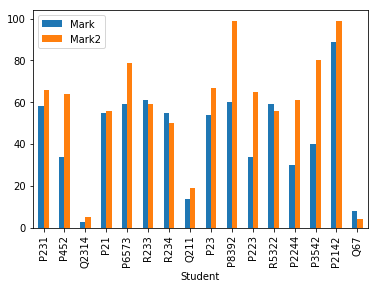

In [19]:
Combineddf.plot.bar(x='Student')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae92d7b8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae8acf98>], dtype=object)

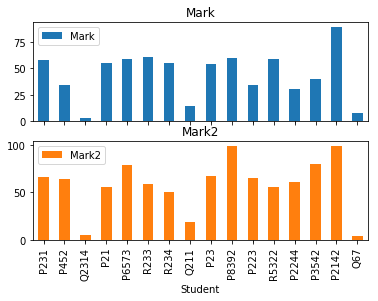

In [20]:
# Does it help to split out the two Mark sets into different subplots?
Combineddf.plot.bar(x='Student', subplots=True)

Doesn't look like an improvement.

**Note to self:**  The above has different _y_-axis values. 

Left to itself, each subplot has a different range on the _y_-axis.  Setting `ylim` should solve that!

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae8c6ac8>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae71abe0>], dtype=object)

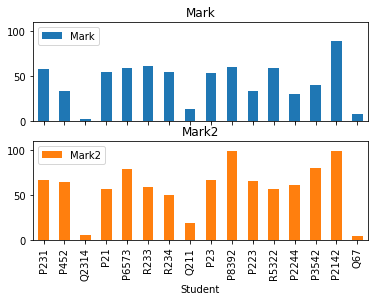

In [21]:
Combineddf.plot.bar(x='Student', subplots=True, ylim=(0,110))

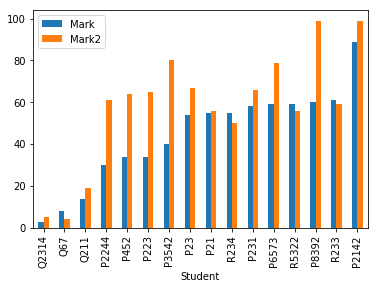

In [22]:
# Let's try sorting the original bar chart on different values.
Combineddf.sort_values(by=['Mark']).plot.bar(x='Student')

#### Observations
There's a group of P students performing below the pass mark on the Mark module, but doing much better on the Mark2 module.  They seem to stand out a bit as a group.  
All the Q students are at the lower end of the performance for the Mark module.

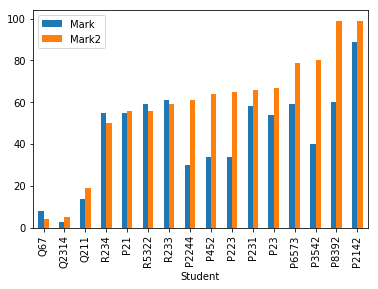

In [23]:
Combineddf.sort_values(by=['Mark2']).plot.bar(x='Student')

#### Observations
That noteable P group has lost a member, but there are still three that look unusual in the middle range.  The Q students are also at the lower end of the performance for the Mark2 module.

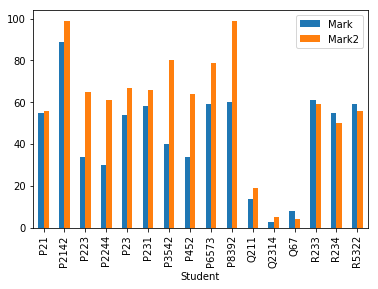

In [24]:
Combineddf.sort_values(by=['Student']).plot.bar(x='Student')

#### Observations
Q students are doing very badly on both modules. 

P students are doing better on the Mark2 module than the Mark module - _I wish I'd changed the mark column names to show the module codes!_ 

The two R students are doing slightly better on the Mark module than the Mark2 module. _Let's change those names!_

In [25]:
Combineddf.columns=['Student', 'QQ223Mark', 'QQ224Mark']
Combineddf

,Student,QQ223Mark,QQ224Mark
0,P231,58,66
1,P452,34,64
2,Q2314,3,5
3,P21,55,56
4,P6573,59,79
5,R233,61,59
6,R234,55,50
7,Q211,14,19
8,P23,54,67
9,P8392,60,99


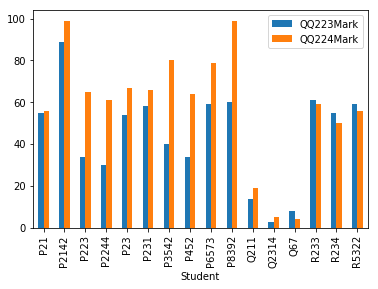

In [26]:
Combineddf.sort_values(by=['Student']).plot.bar(x='Student')

#### Extended scatter plot
I wonder if the performance differences show on the scatter diagram.  Let's add a fourth column to `Combineddf` with the first letter of the student number, then use this to colour the scatter plot. (The 'c' column needs to be numeric - so let's use the ordinal/Unicode value of the first letter, generated using `ord()`.)

In [27]:
LetterSeries = pd.Series(ord(i[0]) for i in Combineddf['Student'])
Combineddf['Letter'] = LetterSeries
Combineddf

,Student,QQ223Mark,QQ224Mark,Letter
0,P231,58,66,80
1,P452,34,64,80
2,Q2314,3,5,81
3,P21,55,56,80
4,P6573,59,79,80
5,R233,61,59,82
6,R234,55,50,82
7,Q211,14,19,81
8,P23,54,67,80
9,P8392,60,99,80


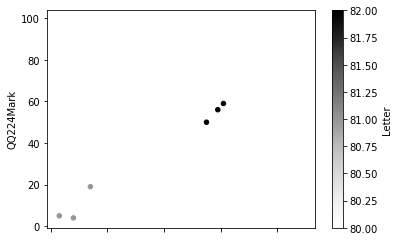

In [28]:
Combineddf.plot.scatter(x='QQ223Mark', y='QQ224Mark', c='Letter')


#### Observations
The sample is too small to draw any conclusions from the colouring. Q students are clearly clustered 'low' on _x_ and _y_.  The R and P students showing less evidence of distinct clustering.  

It's not clear if this is just a small sample bias, or something a bigger population would reinforce.
_We don't have a bigger population, so note the observation and move on_.

#### Oops
Forgot to check the apparent skewed distributions - let's take a quick look.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae195898>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae1087b8>], dtype=object)

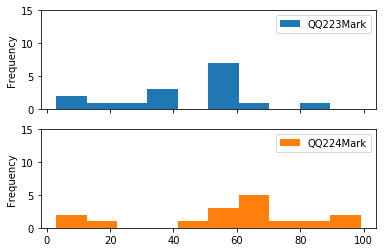

In [29]:
Combineddf.plot.hist(x='Student', y=['QQ223Mark','QQ224Mark'],
                ylim=(0,15), subplots=True)

#### Observations
This is a small sample set for a histogram; with some bins having only a single data element in them. However, the QQ224 histogram shows more students at the higher marks than the QQ223 histogram.

## Analysis summary

Stats|Max|Min|Mean|Median
----|---|---|----|-----
QQ223|89|3|44.56|54.5
QQ224|99|4|58.06|62.5


The stats suggest that students generally perform better on QQ224. This is reinforced by the histogram plots, showing QQ224 results skewed toward the higher end.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae0b8ef0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f2cae026a58>], dtype=object)

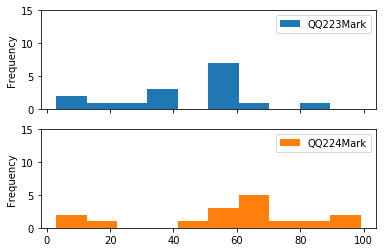

In [30]:
Combineddf.plot.hist(x='Student', y=['QQ223Mark','QQ224Mark'], ylim=(0,15), subplots=True)

Sorting the data by the student number indicates a difference in sub-groups of students, based on the initial letter of their student number.  Q students perform poorly on both modules, with P and R students showing slight differences in performance patterns.

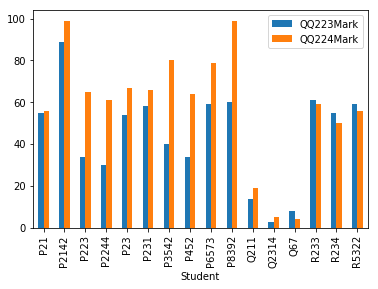

In [31]:
Combineddf.sort_values(by=['Student']).plot.bar(x='Student', y=['QQ223Mark','QQ224Mark'])

### Warning
Any conclusions are hampered by the small size of the datasets, but the significance of the student number allocation is probably worth exploring further.

## Summary
This has been a very quick descriptive analysis of two datasets using simple statistics and simple visualisations.

# What next?

If you are working through this Notebook as part of an inline exercise, return to the module materials now.

If you are working through this set of Notebooks as a whole, move on to: `04.5 split-apply-combine with SQL and pandas`.